In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


/opt/intel/inteloneapi/pytorch/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/u194151/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194151/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import torch

In [3]:
print(torch.__version__)

2.0.1+cu117


##lol testing this out

In [4]:
 ten_1 = torch.rand(3,10,10)

In [5]:
print(ten_1)
print(f"Shape of tensor: {ten_1.shape}")
print(f"Datatype of tensor: {ten_1.dtype}")
print(f"Device tensor is stored on: {ten_1.device}")

tensor([[[0.2908, 0.8636, 0.0103, 0.5735, 0.3265, 0.0846, 0.4394, 0.6300,
          0.9026, 0.0260],
         [0.2704, 0.9776, 0.1116, 0.5735, 0.9913, 0.4010, 0.7880, 0.3897,
          0.0315, 0.5689],
         [0.8833, 0.0361, 0.1762, 0.4806, 0.7982, 0.3879, 0.9116, 0.2505,
          0.0115, 0.8602],
         [0.8236, 0.8850, 0.3155, 0.2928, 0.6255, 0.7082, 0.8248, 0.8912,
          0.8340, 0.6598],
         [0.1184, 0.3954, 0.5878, 0.9203, 0.8464, 0.0936, 0.8404, 0.4680,
          0.2117, 0.8602],
         [0.1038, 0.7662, 0.6479, 0.8972, 0.2929, 0.6987, 0.6385, 0.9739,
          0.3351, 0.0271],
         [0.3213, 0.1195, 0.1648, 0.7900, 0.9436, 0.5474, 0.9652, 0.0131,
          0.3254, 0.8155],
         [0.7123, 0.3558, 0.3267, 0.2935, 0.3711, 0.5858, 0.9360, 0.7740,
          0.1394, 0.5150],
         [0.3415, 0.8540, 0.2973, 0.4785, 0.5114, 0.1812, 0.3807, 0.8320,
          0.8295, 0.6477],
         [0.3807, 0.0666, 0.8363, 0.4087, 0.2954, 0.3594, 0.8736, 0.4650,
          0.9085,

In [6]:
random_seed = 3

torch.manual_seed(random_seed)
ten_3 = torch.rand(1,3,3)

torch.manual_seed(random_seed)
ten_4= torch.rand(1,3,3)

ten_3, ten_4

(tensor([[[0.0043, 0.1056, 0.2858],
          [0.0270, 0.4716, 0.0601],
          [0.7719, 0.7437, 0.5944]]]),
 tensor([[[0.0043, 0.1056, 0.2858],
          [0.0270, 0.4716, 0.0601],
          [0.7719, 0.7437, 0.5944]]]))

In [7]:
from torch import nn

In [8]:
# Base text and natural language processing library
import torchtext

# Other components of TorchText (premade datasets, pretrained models and text transforms)
from torchtext import datasets, models, transforms

In [9]:
# Import PyTorch Dataset (you can store your data here) and DataLoader (you can load your data here)
from torch.utils.data import Dataset, DataLoader

In [10]:
SEED = 2019

#Torch
torch.manual_seed(SEED)

#Cuda algorithms
torch.backends.cudnn.deterministic = True  

In [11]:
import torch
import os
import pathlib
import numpy as np
import string
import re
import glob
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from collections import Counter
from torch.utils.data import DataLoader, Dataset, Subset
plt.style.use('ggplot')

In [12]:
# Set seed.
seed = 3
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

In [13]:
def find_longest_length(text_file_paths):
   
    max_length = 0
    for path in text_file_paths:
        with open(path, 'r') as f:
            text = f.read()
            # Remove <br> tags.
            text = re.sub('<[^>]+>+', '', text)
            corpus = [
                word for word in text.split()
            ]
        if len(corpus) > max_length:
            max_length = len(corpus)
    return max_length

In [14]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [15]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:
true_data["label"] = 1
fake_data["label"] = 0

In [17]:
data = pd.concat([true_data, fake_data], axis=0)

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

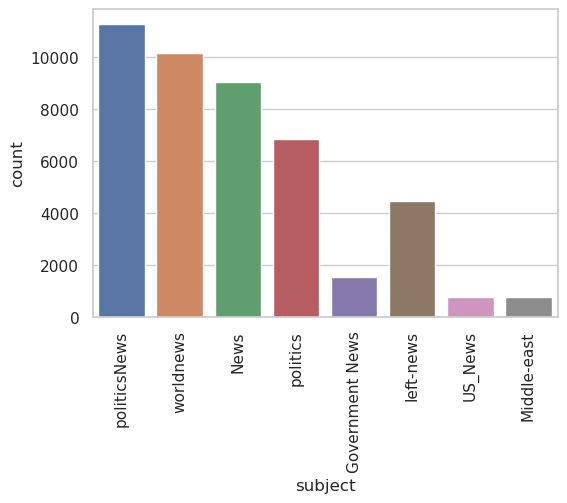

In [18]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [19]:
data['text'] = data['title'] +' '+data['text']
# Either you could data.drop["column names"] or del data["column names"]
del data['title']
del data['subject']
del data['date']

In [20]:
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [21]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label
0,Hamas calls for Palestinian uprising against I...,1
1,Trump criticizes Congress's move weakening eth...,1
2,Melania's Slovenian hometown eyes Trump win as...,1
3,Special Counsel Mueller filing shows Manafort ...,1
4,Politico Just Threw MAJOR Shade At Trump Over...,0


In [22]:
def find_avg_sentence_length(text_file_paths):
    """
    Find the average sentence in the entire training set. 
    :param text_file_paths: List, containing all the text file paths.
    Returns:
        avg_len: Average length.
    """
    sentence_lengths = []
    for path in text_file_paths:
        with open(path, 'r') as f:
            text = f.read()
            # Remove <br> tags.
            text = re.sub('<[^>]+>+', '', text)
            corpus = [
                word for word in text.split()
            ]
        sentence_lengths.append(len(corpus))
    return sum(sentence_lengths)/len(sentence_lengths)

In [23]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to /home/u194151/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194151/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def preprocess_text(text_data):
    preprocessed_text = []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
  
    return preprocessed_text

In [25]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44898/44898 [30:11<00:00, 24.79it/s]


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

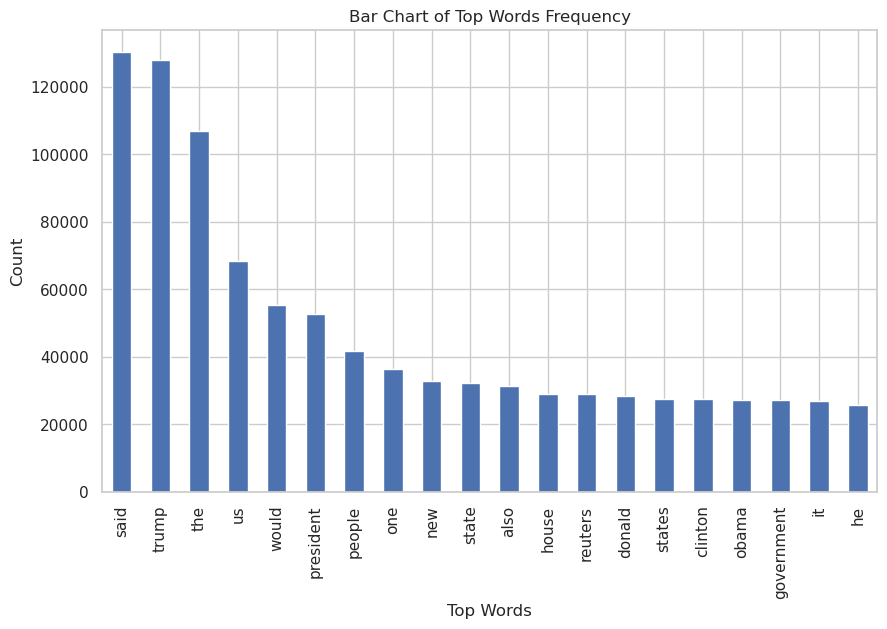

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
  
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [27]:
 def standardize_text(self, input_text):
        # Convert everything to lower case.
        text = input_text.lower()
        # If the text contains HTML tags, remove them.
        text = re.sub('<[^>]+>+', '', text)
        # Remove punctuation marks using `string` module.
        # According to `string`, the following will be removed,
        # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
        text = ''.join([
            character for character in text \
                if character not in string.punctuation
        ])
        return text

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['label'], 
                                                    test_size=0.25)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9948029578594126
0.9899331848552338


In [31]:
from sklearn.tree import DecisionTreeClassifier
  
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
0.9962583518930958


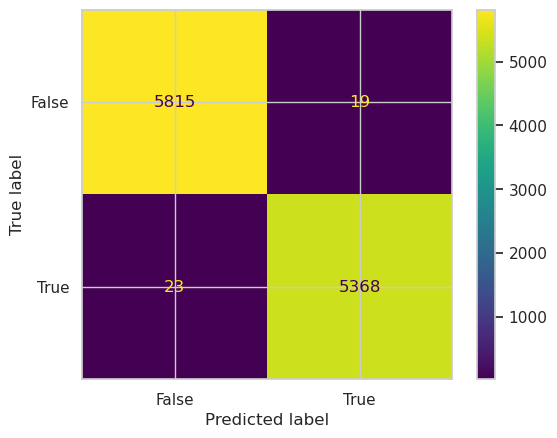

In [32]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [33]:
data2 = pd.read_csv('data/data2.csv')
data2.head()

,tweet,label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real


In [34]:
preprocessed_review2 = preprocess_text2(data2['tweet'].values)
data2['tweet'] = preprocessed_review2

NameError: name 'preprocess_text2' is not defined